## Brain Tumour Detection using Machine Learning Algorithms like Random Forest Classifier, Gradient Boosting Classifier, XGBoost Classifier, Support Vector Machine and comparing their predictions and repeatibility:

In [2]:
# Importing required Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

In [3]:
# Reading the dataset:
df = pd.read_csv('Zernike_Moments_YN_250.csv', header=None)

In [4]:
# Top 5 records:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
0,0.31831,0.042958,0.010156,0.037135,0.100063,0.059319,0.013843,0.028088,0.048925,0.071876,...,0.016465,0.014127,0.012504,0.013368,0.010715,0.010428,0.012418,0.008424,0.015612,YES
1,0.31831,0.131339,0.056533,0.043445,0.028023,0.057654,0.002174,0.015591,0.030578,0.067312,...,0.019978,0.010809,0.034376,0.012750,0.030357,0.005956,0.019903,0.006420,0.033680,YES
2,0.31831,0.066687,0.052518,0.019200,0.011847,0.011882,0.002686,0.010105,0.013947,0.023271,...,0.007538,0.016812,0.007287,0.016342,0.005139,0.020199,0.013016,0.021188,0.002611,YES
3,0.31831,0.016715,0.039403,0.030387,0.006614,0.015393,0.010426,0.003477,0.016265,0.003031,...,0.018493,0.021749,0.009007,0.015955,0.018917,0.004270,0.014429,0.007866,0.016589,YES
4,0.31831,0.025001,0.021282,0.035434,0.016394,0.044254,0.019344,0.009703,0.005623,0.012174,...,0.005710,0.008091,0.007286,0.007084,0.004886,0.012870,0.013376,0.007630,0.016100,YES


In [5]:
# Finding the number of row and Columns:
df.shape

(250, 290)

In [6]:
# Target data:
df[289].value_counts()

YES    154
NO      96
Name: 289, dtype: int64

In [7]:
# To determine how many patients have Brain Tumour and how many do not(Target data):
print(round(df[289].value_counts()[1]/len(df) * 100,2), '% of the patients who has Brain Tumour.')
print(round(df[289].value_counts()[0]/len(df) * 100,2), '% of the patients who do not have Brain Tumour.')

38.4 % of the patients who has Brain Tumour.
61.6 % of the patients who do not have Brain Tumour.


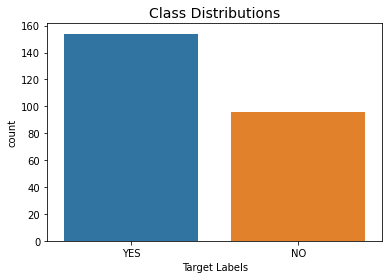

In [8]:
# Plotting the target distribution:
sns.countplot(x = df[289])
plt.title('Class Distributions', fontsize=14)
plt.xlabel("Target Labels")
plt.show()

In [9]:
# Shuffling the whole dataset:
df = df.sample(frac=1, random_state=0).reset_index(drop=True)

In [10]:
# After shuffling:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
0,0.31831,0.042712,0.010810,0.016246,0.013723,0.025530,0.004094,0.011501,0.042827,0.005350,...,0.002403,0.010871,0.018847,0.012027,0.004450,0.018338,0.017326,0.001737,0.011057,NO
1,0.31831,0.076294,0.191613,0.161184,0.019352,0.069739,0.123063,0.075663,0.012809,0.013368,...,0.020009,0.026577,0.023802,0.018322,0.020650,0.012505,0.012780,0.011807,0.021180,YES
2,0.31831,0.090509,0.003142,0.055604,0.028385,0.004643,0.014882,0.026152,0.010947,0.010543,...,0.005868,0.015268,0.008084,0.022066,0.001968,0.022256,0.012318,0.025472,0.001286,YES
3,0.31831,0.011740,0.007222,0.005579,0.002402,0.005769,0.002898,0.003528,0.002909,0.001386,...,0.010026,0.017193,0.002296,0.014789,0.004481,0.016137,0.013105,0.008306,0.006268,NO
4,0.31831,0.012451,0.034418,0.030085,0.041330,0.019037,0.011416,0.047149,0.018054,0.032980,...,0.019599,0.010177,0.021806,0.005711,0.006053,0.008584,0.025076,0.017768,0.014713,NO


In [11]:
# Converting categorical values of Target feature into numerical:
df[289].replace(['YES','NO'], [1,0], inplace=True)

In [12]:
# After Converting Target feature to numerical:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
0,0.31831,0.042712,0.010810,0.016246,0.013723,0.025530,0.004094,0.011501,0.042827,0.005350,...,0.002403,0.010871,0.018847,0.012027,0.004450,0.018338,0.017326,0.001737,0.011057,0
1,0.31831,0.076294,0.191613,0.161184,0.019352,0.069739,0.123063,0.075663,0.012809,0.013368,...,0.020009,0.026577,0.023802,0.018322,0.020650,0.012505,0.012780,0.011807,0.021180,1
2,0.31831,0.090509,0.003142,0.055604,0.028385,0.004643,0.014882,0.026152,0.010947,0.010543,...,0.005868,0.015268,0.008084,0.022066,0.001968,0.022256,0.012318,0.025472,0.001286,1
3,0.31831,0.011740,0.007222,0.005579,0.002402,0.005769,0.002898,0.003528,0.002909,0.001386,...,0.010026,0.017193,0.002296,0.014789,0.004481,0.016137,0.013105,0.008306,0.006268,0
4,0.31831,0.012451,0.034418,0.030085,0.041330,0.019037,0.011416,0.047149,0.018054,0.032980,...,0.019599,0.010177,0.021806,0.005711,0.006053,0.008584,0.025076,0.017768,0.014713,0


In [13]:
# Splitting into Independent and Dependent features:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [14]:
# Train-Test spilt:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [15]:
# Printing the shape after train-test split:
print(x_train.shape)
print(x_test.shape)

(200, 289)
(50, 289)


In [16]:
# Train-Test data distribution
print("Distributions:")
print("\nTrain Set")
print(y_train.value_counts())
print("\nTest Set")
print(y_test.value_counts())

print("\nIn Percentage:")
print("\nTrain Set")
print((y_train.value_counts()/ len(y_train))*100)
print("\nTest Set")
print((y_test.value_counts()/ len(y_test))*100)

Distributions:

Train Set
1    123
0     77
Name: 289, dtype: int64

Test Set
1    31
0    19
Name: 289, dtype: int64

In Percentage:

Train Set
1    61.5
0    38.5
Name: 289, dtype: float64

Test Set
1    62.0
0    38.0
Name: 289, dtype: float64


### Build classification models using Random Forest Classifier, Gradient Boosting Classifier, XGBoost classifier and Support Vector Machine.

### Using Random Forest Classifier:

In [17]:
# Creating an Object of XGBoost Classifier:
rf = RandomForestClassifier()

In [18]:
# Using k-fold cross validation for 5 - folds:
y_train_rf_K = cross_val_predict(rf, x_train, y_train, cv=5)

In [19]:
# For K-fold cross Validation
print("Accuracy  :", round(accuracy_score(y_train, y_train_rf_K),2)*100,"%")
print("Precision :", round(precision_score(y_train, y_train_rf_K),2))
print("Recall    :", round(recall_score(y_train, y_train_rf_K),2))
print("F1_Score  :", round(f1_score(y_train, y_train_rf_K),2))
print("\nConfusion Matrix :")
print(confusion_matrix(y_train, y_train_rf_K))

Accuracy  : 78.0 %
Precision : 0.77
Recall    : 0.91
F1_Score  : 0.83

Confusion Matrix :
[[ 43  34]
 [ 11 112]]


In [20]:
# Fitting the Training data:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
# Predicting the test data:
y_pred_rf = rf.predict(x_test)

In [22]:
# For Random Forest
print("Accuracy  :", round(accuracy_score(y_test, y_pred_rf), 2)*100,"%")
print("Precision :", round(precision_score(y_test, y_pred_rf), 2))
print("Recall    :", round(recall_score(y_test, y_pred_rf), 2))
print("f1_Score  :", round(f1_score(y_test, y_pred_rf), 2))
print("\nConfusion Matrix :")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy  : 78.0 %
Precision : 0.74
Recall    : 1.0
f1_Score  : 0.85

Confusion Matrix :
[[ 8 11]
 [ 0 31]]


### Using Gradient Boosting Classifier:

In [23]:
# Creating an Object of GradientBoostingClassifier:
gbm = GradientBoostingClassifier()

In [24]:
# k-fold cross validation for 5 - folds:
y_train_gbm_K = cross_val_predict(gbm, x_train, y_train, cv=5)

In [25]:
# For K-fold cross Validation:
print("Accuracy  :", round(accuracy_score(y_train, y_train_gbm_K), 2)*100,"%")
print("Precision :", round(precision_score(y_train, y_train_gbm_K), 2))
print("Recall    :", round(recall_score(y_train, y_train_gbm_K), 2))
print("f1_Score  :", round(f1_score(y_train, y_train_gbm_K), 2))
print("\nConfusion Matrix :")
print(confusion_matrix(y_train, y_train_gbm_K))

Accuracy  : 80.0 %
Precision : 0.8
Recall    : 0.89
f1_Score  : 0.84

Confusion Matrix :
[[ 49  28]
 [ 13 110]]


In [26]:
# Fitting the Training data:
gbm.fit(x_train, y_train)

GradientBoostingClassifier()

In [27]:
# Predicting the test data:
y_pred_gbm = gbm.predict(x_test)

In [28]:
# For Gradient Boosting:
print("Accuracy  :", round(accuracy_score(y_test, y_pred_gbm), 2)*100,"%")
print("Precision :", round(precision_score(y_test, y_pred_gbm), 2))
print("Recall    :", round(recall_score(y_test, y_pred_gbm), 2))
print("f1_Score  :", round(f1_score(y_test, y_pred_gbm), 2))
print("\nConfusion Matrix :")
print(confusion_matrix(y_test, y_pred_gbm))

Accuracy  : 74.0 %
Precision : 0.76
Recall    : 0.84
f1_Score  : 0.8

Confusion Matrix :
[[11  8]
 [ 5 26]]


### Using XGBoost Classifier:

In [29]:
# Creating an Object of XGBoost Classifier:
xgb = XGBClassifier()

In [31]:
# k-fold cross validation for 5 - folds:
y_train_xgb_K = cross_val_predict(xgb, x_train, y_train, cv=5)

C:\Users\LENOVO\Anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LENOVO\Anaconda3\envs\myenv\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:02:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\LENOVO\Anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LENOVO\Anaconda3\envs\myenv\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:02:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\LENOVO\Anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LENOVO\Anaconda3\envs\myenv\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:02:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\LENOVO\Anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LENOVO\Anaconda3\envs\myenv\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:02:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\LENOVO\Anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LENOVO\Anaconda3\envs\myenv\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:02:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [32]:
# For K-fold cross Validation
print("Accuracy  :", round(accuracy_score(y_train, y_train_xgb_K), 2)*100,"%")
print("Precision :", round(precision_score(y_train, y_train_xgb_K), 2))
print("Recall    :", round(recall_score(y_train, y_train_xgb_K), 2))
print("f1_Score  :", round(f1_score(y_train, y_train_xgb_K), 2))
print("\nConfusion Matrix :")
print(confusion_matrix(y_train, y_train_xgb_K))

Accuracy  : 79.0 %
Precision : 0.8
Recall    : 0.89
f1_Score  : 0.84

Confusion Matrix :
[[ 49  28]
 [ 14 109]]


In [34]:
# Fitting the Training data:
xgb.fit(x_train, y_train)

[10:02:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
# Predicting the test data:
y_pred_xgb = xgb.predict(x_test)

In [36]:
# For XGBoost Classifier:
print("Accuracy  :", round(accuracy_score(y_test, y_pred_xgb), 2)*100,"%")
print("Precision :", round(precision_score(y_test, y_pred_xgb), 2))
print("Recall    :", round(recall_score(y_test, y_pred_xgb), 2))
print("f1_Score  :", round(f1_score(y_test, y_pred_xgb), 2))
print("\nConfusion Matrix :")
print(confusion_matrix(y_test, y_pred_xgb))

Accuracy  : 86.0 %
Precision : 0.88
Recall    : 0.9
f1_Score  : 0.89

Confusion Matrix :
[[15  4]
 [ 3 28]]


### Using Support Vector Machine:

In [37]:
# Creating an Object of Support Vector Machine:
svm = SVC()

In [38]:
# k-fold cross validation for 5 - folds:
y_train_svm_K = cross_val_predict(svm, x_train, y_train, cv=5)

In [39]:
# For K-fold cross Validation:
print("Accuracy  :", round(accuracy_score(y_train, y_train_svm_K), 2)*100,"%")
print("Precision :", round(precision_score(y_train, y_train_svm_K), 2))
print("Recall    :", round(recall_score(y_train, y_train_svm_K), 2))
print("f1_Score  :", round(f1_score(y_train, y_train_svm_K), 2))
print("\nConfusion Matrix :")
print(confusion_matrix(y_train, y_train_svm_K))

Accuracy  : 66.0 %
Precision : 0.66
Recall    : 0.94
f1_Score  : 0.77

Confusion Matrix :
[[ 16  61]
 [  7 116]]


In [40]:
# Fitting the Training data:
svm.fit(x_train, y_train)

SVC()

In [41]:
# Predicting the test data:
y_pred_svm = svm.predict(x_test)

In [42]:
# For SVM:
print("Accuracy :", round(accuracy_score(y_test, y_pred_svm), 2)*100,"%")
print("Precision :", round(precision_score(y_test, y_pred_svm), 2))
print("Recall :", round(recall_score(y_test, y_pred_svm), 2))
print("f1_Score :", round(f1_score(y_test, y_pred_svm), 2))
print("\nConfusion Matrix :")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy : 68.0 %
Precision : 0.66
Recall : 1.0
f1_Score : 0.79

Confusion Matrix :
[[ 3 16]
 [ 0 31]]


### Conclusion, Comparing the performance of all the models (Random Forest, GBM, XGBOOST and SVM)

- Accuracy of Random Forest : **78%**
- Accuracy of GBM   : **74%**
- Accuracy of XGBoost   : **86%**
- Accuracy of SVM   : **68%**

- Precision of Random Forest : **0.74**
- Precision of GBM   : **0.76**
- Precision of XGBoost   : **0.88**
- Precision of SVM   : **0.66**

- Recall of Random Forest : **1.0**
- Recall of GBM   : **0.84**
- Recall of XGBoost   : **0.90**
- Recall of SVM   : **1.0**

- F1-Score of Random Forest : **0.85**
- F1-Score of GBM   : **0.80**
- F1-Score of XGBoost   : **0.89**
- F1-Score of SVM   : **0.79**